# **Cornor Detection**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Corner detection** is a  technique in computer vision used to identify and locate key points (corners)in an image. Corners are distinctive features that can be used for various applications such as image stitching, object recognition, and tracking. 

One popular method for corner detection is the Harris Corner Detection algorithm. The steps of such an algorithm are briefly described below:

1. Gradient Calculation
    - Compute the gradient along the horizontal and vertical axes
    - Map the computed gradients onto a gradient space, where the x-axis and y-axis represent the graidents along the x-axis and the y-axis of the image, respectively.
2. Ellipses Fitting and Harris Matrix
    - An ellipse drawn to fit the points. The major axis of the ellipse is labelled as while the minor axis is labelled as lambda2
    - A matrix M is constructued using the local graidents. This matrix is used to compute lambda1 and lambda2
3. Harris Response (R)
    - The Harris response is calculated based on the eigenvalues.
    - The higher the Harris response the more likely a given pixel is a corner value. The lower the Harris response the less likely the given pixel is a corner value.
    
---

In OpenCV, you can use the Harris Corner detection using the `cv2.cornerHarris()` function

`cv2.cornerHarris(src, blockSize, ksize, k)`
- src: The input image (Must be a single channel of type float)
- blockSize: Size of the neighborhood considered for corner detection. It is the size of the window over which the gradients and eigenvalues are calculated. Typically, it is set to an odd number like 3, 5, etc
- ksize: It represents the size of the Sobel kernel used to compute the image gradients. It is usually set to 3
- k: Harris detector free parameter. It is an empirical constant in the Harris response calculation. Typical values are in the range of 0.04 to 0.06
> A higher value of k results in less corners being detected

In [2]:
img_BGR = cv2.imread('data/images/building.jpeg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_GRAY = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)

In [3]:
distances = cv2.cornerHarris(img_GRAY.astype(np.float32), blockSize = 7, ksize = 3, k = 0.04)

The `cv2.cornerHarris()` function returns a response map, which is an image representing the Harris corner response at each pixel. This response map is a grayscale image where each pixel value corresponds to the strength of the corner response at that location

In [4]:
distances = cv2.dilate(distances, None)

After Harris Corner Detection, the corner response map (distances) contains pixel values representing the strength of the corner response at each location.
Dilation helps to expand and strengthen the regions where corners are detected. It effectively increases the size of the corner regions in the map

In [5]:
img_RGB[distances > 0.01 * distances.max()] = [255, 0, 0]

The above code modifies the RGB image based on the condition specified by the Harris corner response map.

- **`distances > 0.01 * distances.max()`**: This creates a binary mask where each pixel value is `True` if the corresponding value in the `distances` map is greater than 0.01 times the maximum value in the `distances` map. In other words, it identifies pixels in the image where the corner response is relatively high.

- **`img_RGB[...] = [255, 0, 0]`**: This line of code modifies the RGB image. For pixels that satisfy the condition specified by the binary mask, it assigns the color `[255, 0, 0]` (which corresponds to red in RGB) to those pixels.

In summary, the above line of code colors the pixels in the RGB image red where corners are detected, based on the Harris corner response map. The result is a visual representation of detected corners in the original image, with those corners highlighted in red.

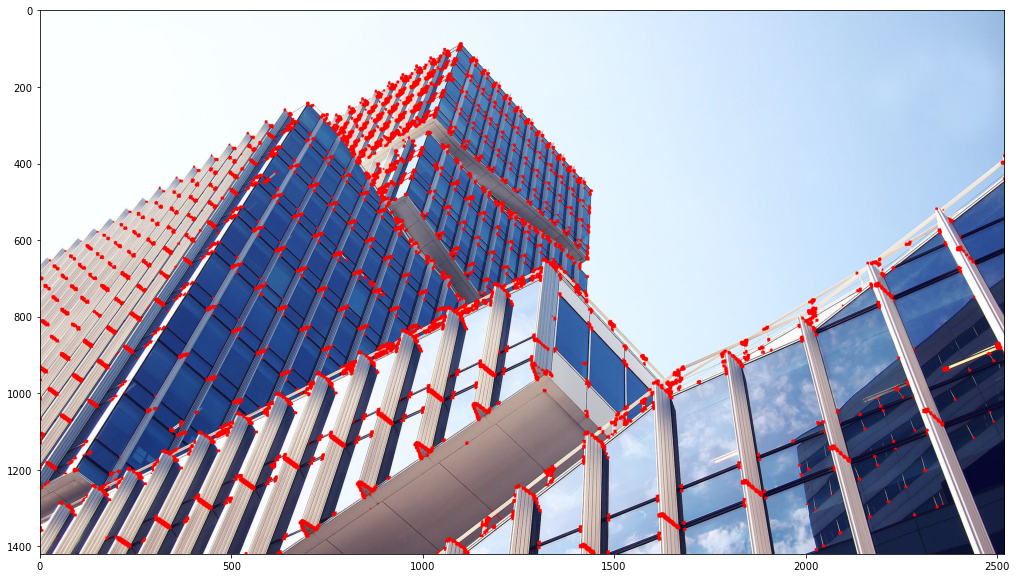

In [6]:
plt.figure(figsize = (20, 10))
plt.imshow(img_RGB);